In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from zoneinfo import ZoneInfo
import requests
import os

In [12]:
df_temp_hum_bright = pd.read_csv("MeshTempHumBright.txt", dtype={"temp":"float", "hum":"int", "bright": "int"}, parse_dates=["date"])
df_motion = pd.read_csv("MeshMotion.txt", parse_dates=["date"])

In [13]:
jst_now = datetime.now(tz=ZoneInfo("Asia/Tokyo"))
jst_now_year = jst_now.year
jst_now_month = jst_now.month
jst_now_day = jst_now.day

In [17]:
def todays_records(df):
    r, _ = df.shape
    for i in range(r):
        if (df["date"][i].year == jst_now_year 
            and df["date"][i].month == jst_now_month 
            and df["date"][i].day == jst_now_day):
            new_df = df.iloc[i:, ]
            new_df.reset_index(inplace=True, drop=True)
            return new_df

In [18]:
df_motion_today = todays_records(df_motion)
df_temp_hum_bright_today = todays_records(df_temp_hum_bright)

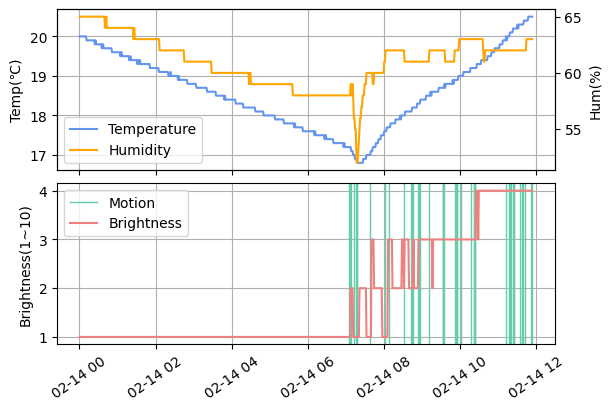

In [24]:
fig, (axU1, axB1) = plt.subplots(2, 1, figsize=(6, 4), layout="constrained", sharex=True)

axU2 = axU1.twinx()

lineU1, = axU1.plot(df_temp_hum_bright_today["date"], df_temp_hum_bright_today["temp"], label="Temperature", color="cornflowerblue")
axU1.set_ylabel("Temp(℃)")

lineU2, = axU2.plot(df_temp_hum_bright_today["date"], df_temp_hum_bright_today["hum"], label="Humidity", color="orange")
axU2.set_ylabel("Hum(%)")

axU1.legend(handles=[lineU1, lineU2])
axU1.grid(True)

for i in range(len(df_motion_today)):
    lineB2 = axB1.axvline(x=df_motion_today["date"][i], color="mediumaquamarine", alpha=1, linewidth=1)
lineB2.set_label("Motion")

lineB1, = axB1.plot(df_temp_hum_bright_today["date"], df_temp_hum_bright_today["bright"], label="Brightness", color="lightcoral")
axB1.set_ylabel("Brightness(1~10)")

axB1.tick_params(axis="x", rotation=35)
axB1.legend()

axB1.grid(True)

In [ ]:
fig.savefig(f"graphs/graph{jst_now_year}-{jst_now_month}-{jst_now_day}.png")

In [ ]:
url = "https://notify-api.line.me/api/notify"
access_token = os.environ['LineNotifyAccessToken']
headers = {'Authorization': 'Bearer ' + access_token}
message = "Today's summary"
image = f'graphs/graph{jst_now_year}-{jst_now_month}-{jst_now_day}.png'
payload = {'message': message}
files = {'imageFile': open(image, 'rb')}
r = requests.post(url, headers=headers, params=payload, files=files)